In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('clustering.csv', names=['x', 'y'])

In [3]:
df.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


Zbiór który mamy sklastrować.

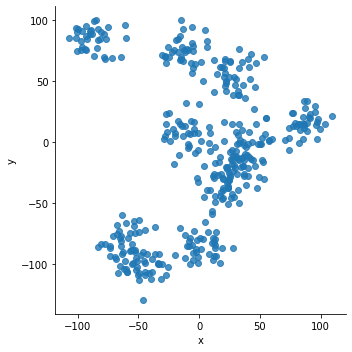

In [59]:
sns.lmplot( x='x', y='y', data=df, fit_reg=False, legend=False)
plt.show()

### KMeans i metoda łokcia

In [49]:
from sklearn.cluster import KMeans

def kmeans_score(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    return kmeans.score(X) * (-1)

In [50]:
scores = []
for i in range (2,15):
    scores.append(kmeans_score(df,i))

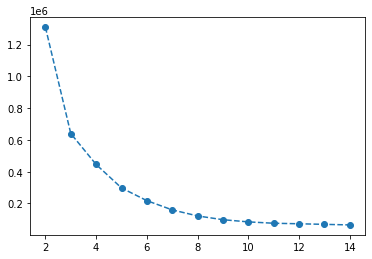

In [60]:
plt.plot(range(2,15), scores, linestyle='--', marker='o')
plt.show()

Metodą łokcia można stwierdzić, że warto przyjąć wartość 7, choć bardzo trudno to jednoznacznie określić w tym przypadku.

In [74]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df)
df['labels'] = kmeans.predict(df)

Widzimy że klastry są całkiem 'sensowne'

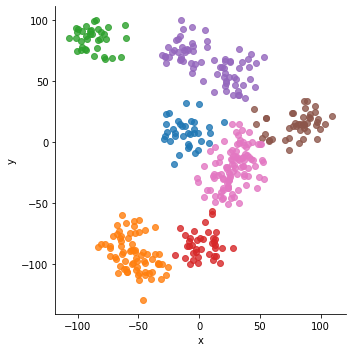

In [75]:
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='labels', legend=False)
plt.show()

### Klastrowanie aglomeracyjne i Silhouette Score

In [19]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

def Ac_score(X, n_clusters):
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage = 'ward')
    labels = ac.fit_predict(X)
    return silhouette_score(X, labels)

In [25]:
Ac_score(df,15)

0.4382991070386273

In [26]:
scores = []
for i in range (2,15):
    scores.append(Ac_score(df,i))

In [32]:
for i in range (2,15):
    print(i,":", scores[i-2])

2 : 0.4695462320278479
3 : 0.49390969464579126
4 : 0.5113486833999132
5 : 0.5368174876093044
6 : 0.51585599700271
7 : 0.5369524818129586
8 : 0.5506938439944646
9 : 0.5367599218179496
10 : 0.5221491193875683
11 : 0.48124510490531774
12 : 0.46930078517627627
13 : 0.46583697432752486
14 : 0.4512969561130386


Największa wartość dla i=8

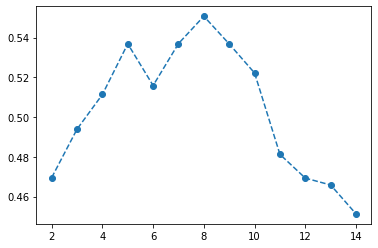

In [23]:
plt.plot(range(2,15), scores, linestyle='--', marker='o')
plt.show()

In [37]:
ac = AgglomerativeClustering(n_clusters=scores.index(max(scores)) + 2, linkage = 'ward')
df['labels'] = ac.fit_predict(df)

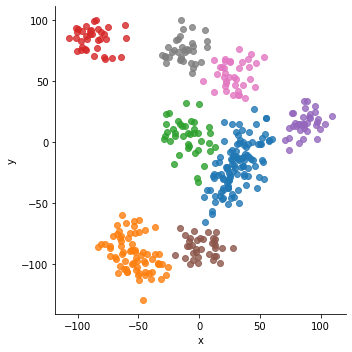

In [38]:
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='labels', legend=False)
plt.show()